# Desafío - Regresión desde el aprendizaje demáquinas

Nuestro objetivo es desarrollar un modelo predictivo para el valor mediano de las casas mediante el entrenamiento de un modelo de regresión lineal.

    ● crim : Tasa de criminalidad por sector de Boston.
    ● zn: proporción de terreno residencial asignado para terrenos baldíos.
    ● indus: proporción de negocios no asociados al comercio por sector.
    ● chas: Dummy. 1 si el sector colinda con el río Charles, 0 de lo contrario.
    ● nox: Concentración de dióxido de carbono.
    ● rm: cantidad promedio de habitaciones por casa.
    ● age: proporción de casas construidas antes de 1940.
    ● dis: distancia promedio a cinco centros de empleos.
    ● rad: índice de accesibilidad a autopistas.
    ● tax: nivel de impuestos asociados a viviendas.
    ● ptratio razón alumno:profesor por sector de Boston.
    ● black: proporción de afroamericanos por sector de Boston.
    ● lstat: porcentaje de población de estratos bajos.
    ● medv: valor mediano de las casas

# Desafío 1: Prepare el ambiente de trabajo

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("boston.csv", index_col = 0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.isnull().sum().sum()

0

**Notar que...**

La BD ha sido actualizada. No, mentira, La BD ha sido reactualizada, OK ahora sí. ¡La Base no tiene datos nulos!

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Desafío 2: División de la muestra

In [4]:
X = df.drop(columns = 'medv')
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

# Desafío 3: Generación de modelos

In [5]:
reg1 = LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
score1 = r2_score(y_test, y_pred1)
score1

0.6956190362781691

In [6]:
reg2 = LinearRegression(fit_intercept = False, normalize = False).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
score2 = r2_score(y_test, y_pred2)
score2

0.6549781334227461

**¡Interesante!**

El modelo normalizado y con intercepto aportó en aprox un 0.05 de poder explicativo de la variable dependiente

# Desafío 4: Obtención de métricas

In [7]:
def report_scores(y_test, predict_y, name = 'results'):
    ECP = mean_squared_error(y_test, predict_y)
    RCuadrado = r2_score(y_test, predict_y)
    return pd.DataFrame({'ECP':[ECP],'RCuadrado':[RCuadrado],'Modelo':[name]})

print(report_scores(y_test, y_pred1,'reg1'))
print("*********************************")
print(report_scores(y_test, y_pred2,'reg2'))

         ECP  RCuadrado Modelo
0  32.321126   0.695619   reg1
*********************************
         ECP  RCuadrado Modelo
0  36.636638   0.654978   reg2


In [8]:
df4 = report_scores(y_test, y_pred1,'reg1').append(report_scores(y_test, y_pred2,'reg2')).reset_index(drop = True)
df4

,ECP,RCuadrado,Modelo
0,32.321126,0.695619,reg1
1,36.636638,0.654978,reg2


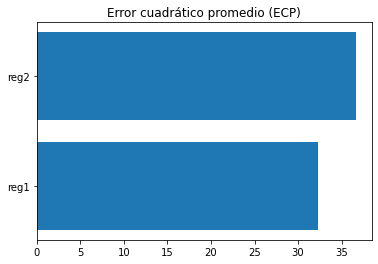

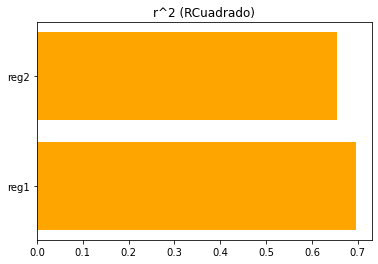

In [9]:
df4_ECP = df4.drop(columns = 'RCuadrado')
df4_RCuadrado = df4.drop(columns = 'ECP')

plt.barh(y = 'Modelo', width = 'ECP', data = df4_ECP)
plt.title("Error cuadrático promedio (ECP)")
plt.show()

plt.barh(y = 'Modelo', width = 'RCuadrado', data = df4_RCuadrado, color = 'orange')
plt.title("r^2 (RCuadrado)")
plt.show()

El Modelo reg1(el cual tiene intercepto y está normalizado) tiene menor error cuadrático promedio y a la vez mayor R^2,
por tanto ambos scores indican que reg1 es mejor que reg2.

**Respuesta**

Por tanto eligo el primer modelo, el normalizado y con intercepto

# Desafío 5: Refactorización del modelo

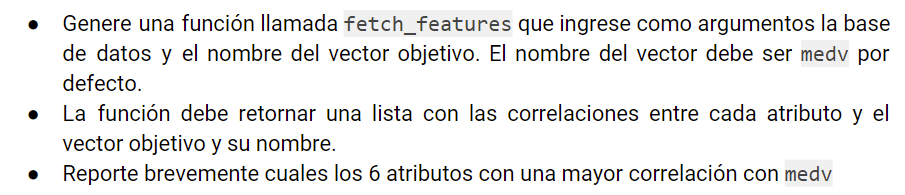

In [60]:
def fetch_features(dataframe, variable = 'medv'):
    return abs(pd.DataFrame(dataframe.corr()[variable]) # Ojo que apliqué el método ABS para no tener problemas con la correlaciones negativas
              ).sort_values(by = variable,ascending = False).drop(
        [variable])#No lo dejé como lista, porque sino no se nota a qué variable corresponde cada correlación

fetch_features(df)

,medv
lstat,0.737663
rm,0.695360
ptratio,0.507787
indus,0.483725
tax,0.468536
nox,0.427321
crim,0.388305
rad,0.381626
age,0.376955
zn,0.360445


In [34]:
print(list(fetch_features(df).head(6).index))
print('\nEstos son los 6 atributos con mayor correlación a medv')

['lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox']

Estos son los 6 atributos con mayor correlación a medv


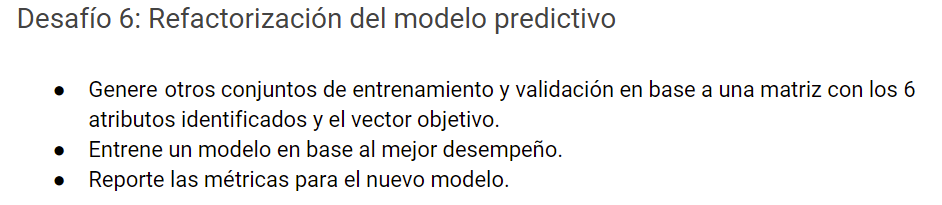

In [57]:
X = df[list(fetch_features(df).head(6).index)]
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

modelo6_0 = LinearRegression(fit_intercept = False, normalize = False).fit(X_train, y_train)
y_predict6_0 = modelo6_0.predict(X_test)

modelo6_1 = LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)
y_predict6_1 = modelo6_1.predict(X_test)

In [58]:
df6 = report_scores(y_test, y_predict6_0,'modelo6_0').append(report_scores(y_test, y_predict6_1,'modelo6_1')).append(df4).reset_index(drop = True)
df6

,ECP,RCuadrado,Modelo
0,41.623481,0.608015,modelo6_0
1,39.607564,0.627000,modelo6_1
2,32.321126,0.695619,reg1
3,36.636638,0.654978,reg2


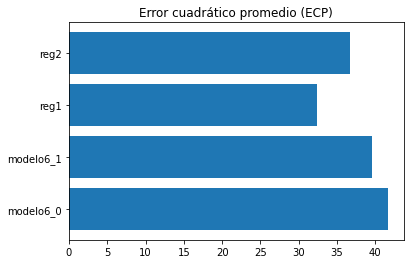

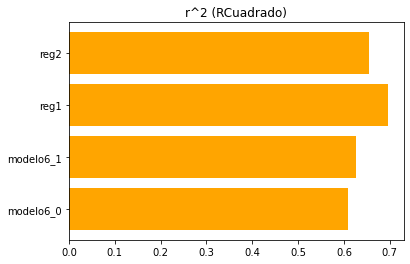

In [56]:
df6_ECP = df6.drop(columns = 'RCuadrado')
df6_RCuadrado = df6.drop(columns = 'ECP')

plt.barh(y = 'Modelo', width = 'ECP', data = df6_ECP)
plt.title("Error cuadrático promedio (ECP)")
plt.show()

plt.barh(y = 'Modelo', width = 'RCuadrado', data = df6_RCuadrado, color = 'orange')
plt.title("r^2 (RCuadrado)")
plt.show()

# **Comentario extra**

¡Los nuevos modelos con sólo los 6 atributos más correlacionados con el vector objetivo no son mejores que las regresiones
hechas anteriormente!

Ambos tienen mayor Error cuadrático promedio y menos r^2 que las 2 regresiones anteriores

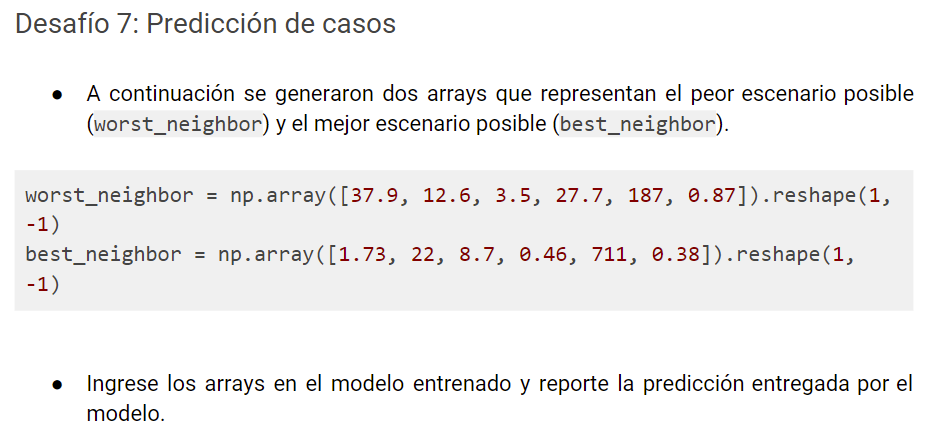

In [16]:
worst_neighbor = np.array([37.9, 12.6, 3.5, 27.7, 187, 0.87]).reshape(1,-1)
best_neighbor = np.array([1.73, 22, 8.7, 0.46, 711, 0.38]).reshape(1,-1)

In [61]:
modelo6_1.predict(worst_neighbor)

array([59.67998243])

In [62]:
modelo6_1.predict(best_neighbor)

array([120.03251126])

# OJO

El orden de las variables de ambos vectores dados.... tienen que estar en el mismo orden en que se definió el modelo para que tenga sentido la predicción, no estoy seguro si el ejercicio está hecho para que me den las mismas 6 variables que el ejercicio espera que me den..... porque de partida la refactorización con sólo los 6 atributos con mayor correlación, no me entregó mejores modelos....